In [1]:
# FUENTE: https://machinelearningmastery.com/robust-regression-for-machine-learning-in-python/
# https://scikit-learn.org/stable/modules/linear_model.html#generalized-linear-models
# sobre métricas para regresión https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d
# https://datascience.stackexchange.com/questions/42760/mad-vs-rmse-vs-mae-vs-msle-vs-r%c2%b2-when-to-use-which

# línea de trazado de lo mejor para múltiples algoritmos de regresión robustos
from random import random
from random import randint
from random import seed
from numpy import arange
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
import matplotlib.pyplot as plt
import requests
import io
import pandas as pd


In [2]:
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html#sklearn.datasets.make_regression
# preparar el conjunto de datos
def get_dataset():
	X, y = make_regression(n_samples=100, n_features=1, tail_strength=0.9, effective_rank=1, n_informative=1, noise=3, bias=50, random_state=1)
	# añadir algunos valores atípicos artificiales
	seed(1)
	for i in range(10):
		factor = randint(2, 4)
		if random() > 0.5:
			X[i] += factor * X.std()
		else:
			X[i] -= factor * X.std()
	return X, y

# diccionario de nombres de modelos y objetos de modelos
def get_models():
	models = list()
	models.append(LinearRegression())
	models.append(HuberRegressor())
	models.append(RANSACRegressor())
	models.append(TheilSenRegressor())
	return models

# trazar el conjunto de datos y la línea de mejor ajuste del modelo
def plot_best_fit(X, y, xaxis, model):
	# ajuste el modelo en todos los datos
	model.fit(X, y)
	# calcular las salidas para la cuadrícula en todo el dominio
	yaxis = model.predict(xaxis.reshape((len(xaxis), 1)))
	# trace la línea de mejor ajuste
	plt.plot(xaxis, yaxis, label=type(model).__name__)


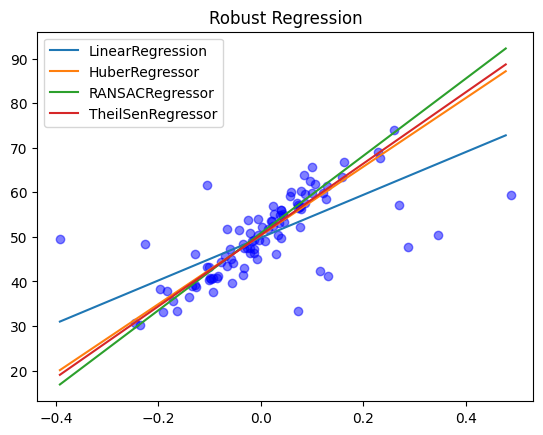

In [6]:
# cargar el conjunto de datos
X, y = get_dataset()
# definir una cuadrícula uniforme en el dominio de entrada
xaxis = arange(X.min(), X.max(), 0.01)
for model in get_models():
	# trace la línea de mejor ajuste
	plot_best_fit(X, y, xaxis, model)
# trazar el conjunto de datos
plt.scatter(X, y, color='blue', alpha=0.5)
# mostrar la trama
plt.title('Robust Regression')
plt.legend()
plt.show()

In [7]:
url = 'https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-en-espacios-verdes/arbolado-en-espacios-verdes.csv'
arb = requests.get(url).content
data_arbolado_parques = pd.read_csv(io.StringIO(arb.decode('utf-8')))

# columnas que me interesan
col_interes = ['diametro', 'altura_tot', 'nombre_com']
nombre = 'nombre_com'  # nombre común, no científico
nombres_interes = ['Jacarandá', 'Palo borracho rosado', 'Eucalipto', 'Ceibo']

# preparo los dataframe
# selecciono x columnas
data_diametro_altura = data_arbolado_parques[col_interes].copy()
# cambio nombre a 'altura'
data_diametro_altura.rename(columns={'altura_tot': 'altura'}, inplace=True)
diametro_altura_especies = data_diametro_altura[data_diametro_altura['nombre_com'].isin(nombres_interes)]
# me quedo con los jacarandás
jaca = diametro_altura_especies[diametro_altura_especies['nombre_com'] == 'Jacarandá']
jaca.reset_index(inplace=True)
print(jaca.shape)
print(jaca.head())
jaca.drop(['nombre_com', 'index'], axis=1, inplace=True)
jaca.tail()
# jaca.shape    # (3255, 2)


(3255, 4)
   index  diametro  altura nombre_com
0    165        10       5  Jacarandá
1    166        10       5  Jacarandá
2    167        10       5  Jacarandá
3    168        10       5  Jacarandá
4    169        10       5  Jacarandá


<ipython-input-7-f8eb392830c1>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jaca.drop(['nombre_com', 'index'], axis=1, inplace=True)


,diametro,altura
3250,97,7
3251,28,8
3252,30,2
3253,10,3
3254,40,17


Text(0.5, 1.0, 'Jacarandás: Altura vs. Diámetro')

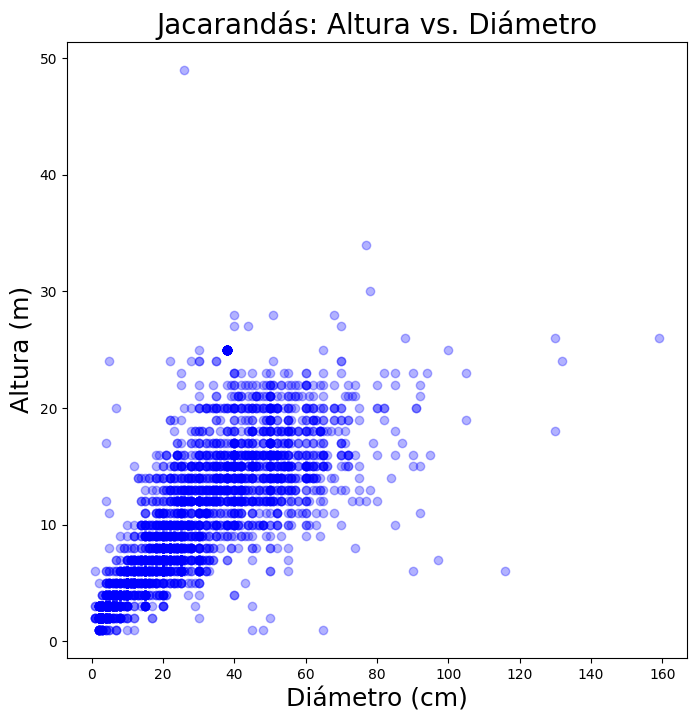

In [5]:
plt.figure(figsize=(8, 8))
plt.plot(jaca['diametro'], jaca['altura'], 'bo', alpha=0.3)
plt.xlabel('Diámetro (cm)', size=18)
plt.ylabel('Altura (m)', size=18)
plt.title('Jacarandás: Altura vs. Diámetro', size=20)

In [ ]:
# Crear las características y la respuesta.
Xja = jaca[['diametro']].to_numpy()
yja = jaca[['altura']].to_numpy()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


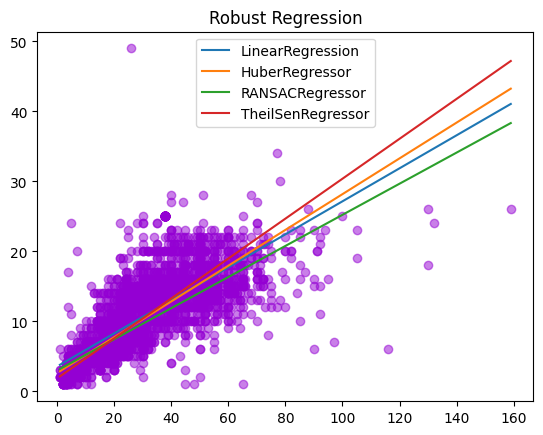

In [ ]:
# definir una cuadrícula uniforme en el dominio de entrada
xaxis = arange(Xja.min(), Xja.max(), 0.01)
for model in get_models():
	# trace la línea de mejor ajuste
	plot_best_fit(Xja, yja, xaxis, model)
# trazar el conjunto de datos
plt.scatter(Xja, yja, color='darkviolet', alpha=0.5)
# mostrar la trama
plt.title('Robust Regression')
plt.legend()
plt.show()